## Final Project

### Hypothesis
Video game details such as publisher, game genre, and console can accurately predict how well the game will sell.

### Steps

* Identify the Problem
* Acquire the Data
* Parse the Data
* Mine the Data
* Refine the Data
* Create a Data Model
* Present the Results

In [174]:
#imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as smf

df_raw = pd.read_csv("vgsales.csv")

In [98]:
df_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df_raw.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
# Check the data for the years 2016, 2017, 2020, and nan
# Drop the rows that are useless

df_raw['Year'].unique()

array([ 2006.,  1985.,  2008.,  2009.,  1996.,  1989.,  1984.,  2005.,
        1999.,  2007.,  2010.,  2013.,  2004.,  1990.,  1988.,  2002.,
        2001.,  2011.,  1998.,  2015.,  2012.,  2014.,  1992.,  1997.,
        1993.,  1994.,  1982.,  2003.,  1986.,  2000.,    nan,  1995.,
        2016.,  1991.,  1981.,  1987.,  1980.,  1983.,  2020.,  2017.])

In [6]:
# Copy the data to delete the rows where there is no year or where the year is 2016 and beyond.

data = df_raw.copy()

In [7]:
# Show data where the year is 2016 and beyond

data[data.Year > 2015] 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
351,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
770,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
845,847,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
1026,1028,Overwatch,PS4,2016.0,Shooter,Activision,0.64,0.68,0.14,0.26,1.73
1156,1158,No Man's Sky,PS4,2016.0,Action,Hello Games,0.58,0.74,0.02,0.26,1.60
1189,1191,Dark Souls III,PS4,2016.0,Role-Playing,Namco Bandai Games,0.58,0.44,0.33,0.21,1.56
1224,1226,FIFA 17,XOne,2016.0,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53
1389,1391,Doom (2016),PS4,2016.0,Shooter,Bethesda Softworks,0.49,0.66,0.02,0.22,1.39


In [8]:
# Drop the data for 2016 and beyond
# This also dropped all nan.

data = data[data.Year < 2016]

In [9]:
# Confirm that I've dropped the data

data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15979.000000,15979.000000,15979.00000,15979.000000,15979.000000,15979.000000,15979.000000
mean,8224.104262,2006.197071,0.26976,0.149093,0.079514,0.048892,0.547537
std,4775.817280,5.714810,0.82956,0.512557,0.314536,0.191612,1.580275
min,1.000000,1980.000000,0.00000,0.000000,0.000000,0.000000,0.010000
25%,4080.500000,2003.000000,0.00000,0.000000,0.000000,0.000000,0.060000
50%,8207.000000,2007.000000,0.08000,0.020000,0.000000,0.010000,0.180000
75%,12332.500000,2010.000000,0.24000,0.110000,0.040000,0.040000,0.490000
max,16600.000000,2015.000000,41.49000,29.020000,10.220000,10.570000,82.740000


In [10]:
# From the above table, I realized that there are no more NaN values in Year, so I used the formulas below to just confirm they are gone.

print data['Year'].isnull().sum()
data['Year'].unique()

0


array([ 2006.,  1985.,  2008.,  2009.,  1996.,  1989.,  1984.,  2005.,
        1999.,  2007.,  2010.,  2013.,  2004.,  1990.,  1988.,  2002.,
        2001.,  2011.,  1998.,  2015.,  2012.,  2014.,  1992.,  1997.,
        1993.,  1994.,  1982.,  2003.,  1986.,  2000.,  1995.,  1991.,
        1981.,  1987.,  1980.,  1983.])

In [37]:
# Check the data dictionary for all these platforms

data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO',
       'GG', 'PCFX'], dtype=object)

### Data Dictionary - Platforms
1	PlayStation 2 (PS2)  
2	Xbox 360 (X360)	  
3	PlayStation 3 (PS3)  	
4	Wii (Wii)	 
5	PlayStation (PS)  	
6	Nintendo DS (DS)  
7	Nintendo Entertainment System (NES)	  
8	Game Boy (GB)  
9	Super Nintendo Entertainment System (SNES)	
10	Game Boy Advance (GBA)	
12	PlayStation Portable (PSP)	
13	PlayStation 4 (PS4)	
14	Xbox (XB)	
15	Nintendo 3DS (3DS)	
16	Nintendo 64 (N64)	
17	GameCube (GC)	
19	Xbox One (XOne)  
21	Wii U (WiiU)	
23	PlayStation Vita (PSV)	
38	Nintendo DSi (DSi)	
44	Playstation VR ()  
47	Game Boy Color (GBC)	
58	Nintendo NX ()	
63	Nintendo 2DS ()

In [130]:
# Show all Genres of games

data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [131]:
# Group data by consoles: Nintendo, Playstation, and Xbox

nintendo = data[(data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'DS') | (data['Platform'] == 'NES') | (data['Platform'] == 'GB') | (data['Platform'] == 'SNES') | (data['Platform'] == 'GBA') | (data['Platform'] == '3DS') | (data['Platform'] == 'N64') | (data['Platform'] == 'GC')]
print nintendo.describe()

               Rank         Year     NA_Sales     EU_Sales     JP_Sales  \
count   6123.000000  6123.000000  6123.000000  6123.000000  6123.000000   
mean    8401.524906  2006.149110     0.286701     0.127557     0.122455   
std     4620.488000     5.352258     1.095983     0.636800     0.451472   
min        1.000000  1983.000000     0.000000     0.000000     0.000000   
25%     4552.500000  2004.000000     0.010000     0.000000     0.000000   
50%     8589.000000  2008.000000     0.090000     0.010000     0.000000   
75%    12275.000000  2010.000000     0.250000     0.070000     0.050000   
max    16600.000000  2015.000000    41.490000    29.020000    10.220000   

       Other_Sales  Global_Sales  
count  6123.000000   6123.000000  
mean      0.031331      0.568542  
std       0.168041      2.107168  
min       0.000000      0.010000  
25%       0.000000      0.060000  
50%       0.010000      0.160000  
75%       0.020000      0.430000  
max       8.460000     82.740000  


In [137]:
# Show highest sales

nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [139]:
# Show lowest sales

nintendo.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.0,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


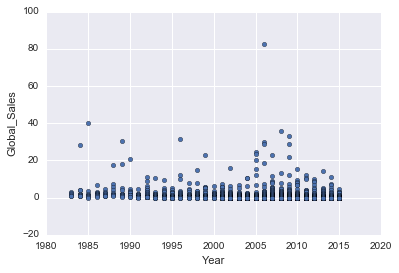

In [133]:
nintendo.plot(kind='scatter', x='Year', y='Global_Sales')

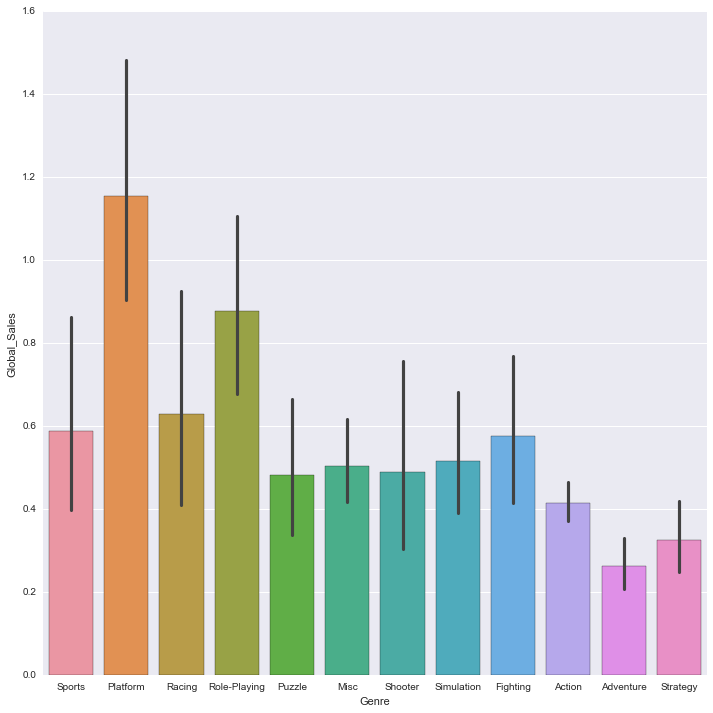

In [140]:
sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = nintendo,
             size=10)

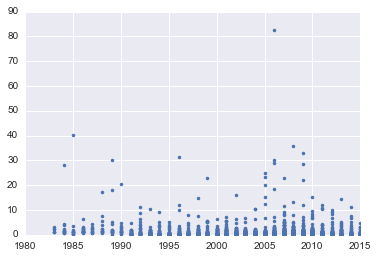

In [141]:
# Create scatterplot

# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(nintendo.Year, nintendo.Global_Sales, '.')
# show the plot
plt.show()

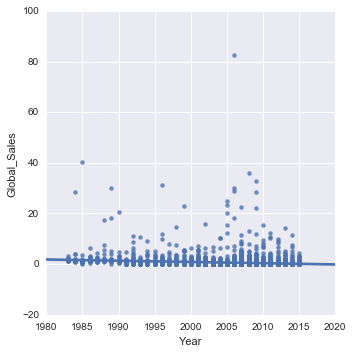

In [142]:
# Linear Regression

sb.lmplot('Year', 'Global_Sales', nintendo)

In [163]:
# Low R-Square, but low p-value

lm = smf.ols(formula='Global_Sales ~ Year', data=nintendo).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     95.94
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           1.73e-22
Time:                        15:22:59   Log-Likelihood:                -13204.
No. Observations:                6123   AIC:                         2.641e+04
Df Residuals:                    6121   BIC:                         2.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     98.6817     10.017      9.851      0.000        79.045   118.319
Year          -0.0489      0.005     -9.795      0.000        -0.059    -0.039
==============================================================================
Omnibus:                    12660.651   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59966906.434
Skew:                          17.306   Prob(JB):                         0.00
Kurtosis:                     486.582   Cond. No.                     7.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While there's a low p-value, the R-squared value is also low. Year is not a good predictor of how well a game will sell. 

In [162]:
nintendo.Genre.value_counts()

Action          1116
Misc             920
Sports           780
Role-Playing     504
Platform         502
Simulation       444
Adventure        426
Puzzle           419
Racing           367
Shooter          248
Fighting         217
Strategy         180
Name: Genre, dtype: int64

In [143]:
nin_gd = nintendo.join(pd.get_dummies(nintendo.Genre, prefix = 'genre'))
nin_gd.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


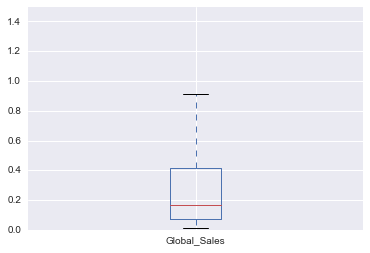

In [175]:
nin_gd[(nin_gd['Genre'] == 'Sports')].plot(kind='box', x='Year', y='Global_Sales', ylim=(0,1.5))

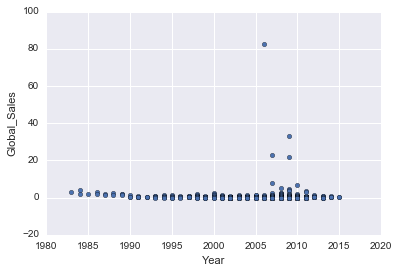

In [147]:
nin_gd[(nin_gd['genre_Sports'] == 1)].plot(kind='scatter', x='Year', y='Global_Sales')

# Playstation

In [43]:
playstation = data[(data['Platform'] == 'PS') | (data['Platform'] == 'PS2') | (data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'PSP') | (data['Platform'] == 'PSV')]
print playstation.describe()

               Rank         Year     NA_Sales     EU_Sales     JP_Sales  \
count   6363.000000  6363.000000  6363.000000  6363.000000  6363.000000   
mean    7926.242810  2006.210121     0.236373     0.168793     0.072207   
std     4838.070919     5.417816     0.517275     0.433980     0.214623   
min       17.000000  1994.000000     0.000000     0.000000     0.000000   
25%     3667.500000  2002.000000     0.000000     0.000000     0.000000   
50%     7655.000000  2007.000000     0.070000     0.040000     0.000000   
75%    12115.500000  2010.000000     0.225000     0.150000     0.060000   
max    16598.000000  2015.000000     9.430000     9.270000     4.870000   

       Other_Sales  Global_Sales  
count  6363.000000   6363.000000  
mean      0.072163      0.549481  
std       0.242273      1.129833  
min       0.000000      0.010000  
25%       0.000000      0.070000  
50%       0.020000      0.200000  
75%       0.060000      0.550000  
max      10.570000     21.400000  


In [42]:
playstation.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24


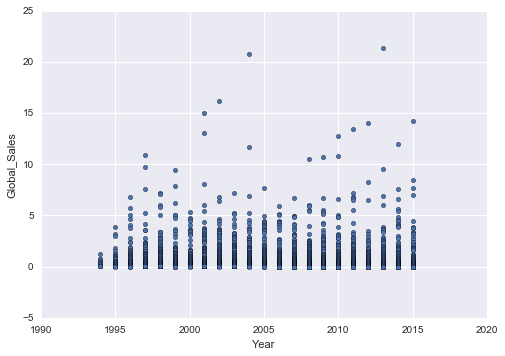

In [61]:
playstation.plot(kind='scatter', x='Year', y='Global_Sales')

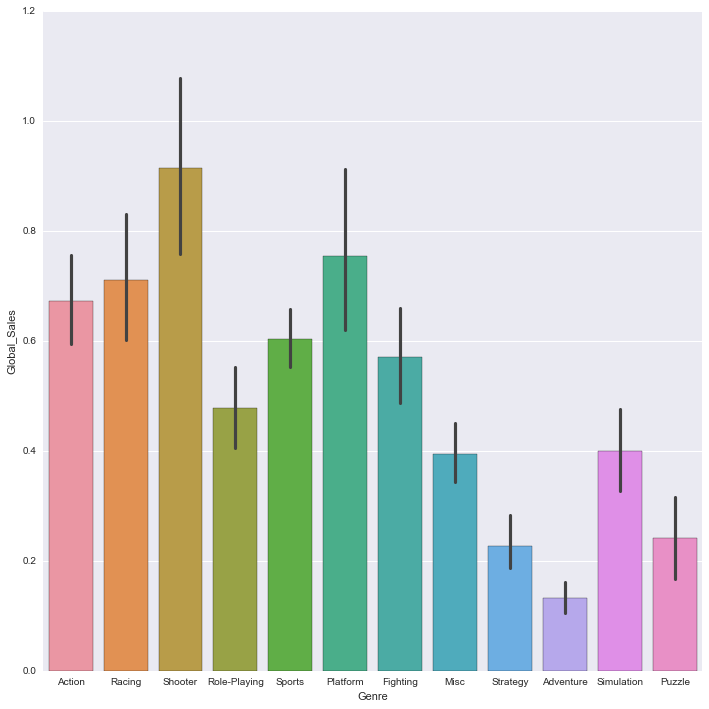

In [49]:
sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = playstation,
             size=10)

# Xbox

In [44]:
xbox = data[(data['Platform'] == 'X360') | (data['Platform'] == 'XB') | (data['Platform'] == 'XOne')]
print xbox.describe()

               Rank         Year     NA_Sales    EU_Sales     JP_Sales  \
count   2189.000000  2189.000000  2189.000000  2189.00000  2189.000000   
mean    7374.135222  2007.895386     0.389461     0.17281     0.006400   
std     4564.904971     3.975993     0.850373     0.39716     0.020526   
min       16.000000  2000.000000     0.000000     0.00000     0.000000   
25%     3371.000000  2004.000000     0.070000     0.01000     0.000000   
50%     7224.000000  2008.000000     0.150000     0.04000     0.000000   
75%    10849.000000  2011.000000     0.370000     0.16000     0.000000   
max    16556.000000  2015.000000    14.970000     5.31000     0.240000   

       Other_Sales  Global_Sales  
count  2189.000000   2189.000000  
mean      0.047487      0.616519  
std       0.114567      1.327004  
min       0.000000      0.010000  
25%       0.000000      0.090000  
50%       0.010000      0.220000  
75%       0.040000      0.600000  
max       1.670000     21.820000  


In [59]:
xbox.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


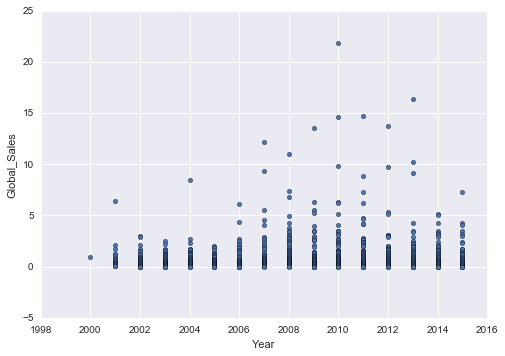

In [60]:
xbox.plot(kind='scatter', x='Year', y='Global_Sales')

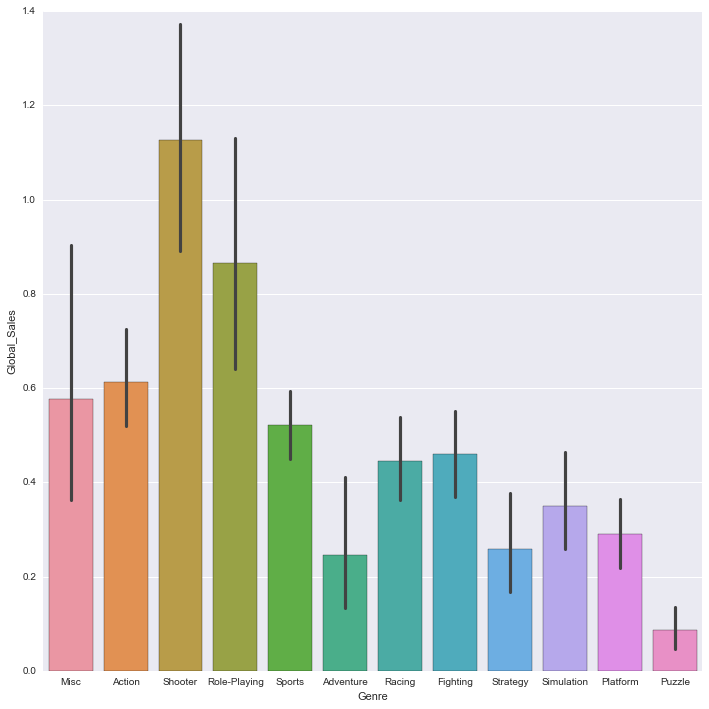

In [50]:
sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = xbox,
             size=10)

In [58]:
xbox[xbox.Genre == 'Action'].mean()

Rank            6994.274131
Year            2008.731660
NA_Sales           0.368224
EU_Sales           0.189981
JP_Sales           0.006062
Other_Sales        0.049537
Global_Sales       0.613977
dtype: float64

# Misc

In [50]:
# Check to see if there are any games that span across multiple platforms, like GTA.
gta = data[data['Name'].str.contains("Grand Theft Auto")]
gta.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


In [24]:
# See if there are any correlations.
# Looks like there are correlations in sales data-- not surprising
# Interesting which area's sales have correlation - like European Sales don't have such a strong correlation with Japan Sales

data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.162287,-0.400187,-0.378374,-0.269076,-0.331476,-0.426326
Year,0.162287,1.000000,-0.085347,0.011394,-0.170121,0.047488,-0.069223
NA_Sales,-0.400187,-0.085347,1.000000,0.770262,0.451618,0.634225,0.941499
EU_Sales,-0.378374,0.011394,0.770262,1.000000,0.437859,0.725572,0.903753
JP_Sales,-0.269076,-0.170121,0.451618,0.437859,1.000000,0.290955,0.613358
Other_Sales,-0.331476,0.047488,0.634225,0.725572,0.290955,1.000000,0.747362
Global_Sales,-0.426326,-0.069223,0.941499,0.903753,0.613358,0.747362,1.000000
